In [1]:
import os
import cv2
import numpy as np
from keras import layers
from keras import models
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def load_custom_data(data_dir, target_size=(28, 28)):
    images = []
    labels = []

    categories = os.listdir(data_dir)
    label_to_index = {category: i for i, category in enumerate(categories)}

    for category in categories:
        category_dir = os.path.join(data_dir, category)
        label = label_to_index[category]

        for filename in os.listdir(category_dir):
            image_path = os.path.join(category_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Lee la imagen en escala de grises

            if image is not None:
                # Redimensiona la imagen al tamaño deseado
                image = cv2.resize(image, target_size)
                images.append(image)
                labels.append(label)

    return np.array(images), np.array(labels)

In [2]:
# Cargar tus datos personalizados
data_dir = '../Data/PetroImages_Augmentedx3'
images, labels = load_custom_data(data_dir)

In [3]:
### from sklearn.model_selection import train_test_split
# Separar los datos en conjuntos de entrenamiento y validación
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Asegúrate de que las dimensiones sean las adecuadas para tu modelo
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
print(type(train_images))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Definir el modelo CNN
convNN = models.Sequential()
convNN.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

num_classes = 106  # número correcto de clases en tus datos

# Agregar capa Flatten y capa densamente conectada
convNN.add(layers.Flatten())
convNN.add(layers.Dense(64, activation='relu'))
convNN.add(layers.Dense(num_classes, activation='softmax'))  # Reemplaza "num_classes" con el número correcto de clases

# Compilar el modelo
convNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# Entrenar el modelo
convNN.fit(train_images, train_labels, epochs=200, batch_size=32)


Epoch 1/200
598/598 [==============================] - 42s 70ms/step - loss: 4.1142 - acc: 0.0724
Epoch 2/200
598/598 [==============================] - 41s 68ms/step - loss: 3.3843 - acc: 0.1817
Epoch 3/200
598/598 [==============================] - 42s 71ms/step - loss: 2.9384 - acc: 0.2643
Epoch 4/200
598/598 [==============================] - 42s 71ms/step - loss: 2.5927 - acc: 0.3324
Epoch 5/200
598/598 [==============================] - 42s 70ms/step - loss: 2.3369 - acc: 0.3903
Epoch 6/200
598/598 [==============================] - 41s 68ms/step - loss: 2.1244 - acc: 0.4336
Epoch 7/200
598/598 [==============================] - 41s 69ms/step - loss: 1.9559 - acc: 0.4711
Epoch 8/200
598/598 [==============================] - 41s 69ms/step - loss: 1.8161 - acc: 0.5067
Epoch 9/200
598/598 [==============================] - 41s 68ms/step - loss: 1.7057 - acc: 0.5294
Epoch 10/200
598/598 [==============================] - 43s 71ms/step - loss: 1.5984 - acc: 0.5551
Epoch 11/200
598/59

In [6]:
convNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
convNN.add(layers.Flatten())

In [8]:
convNN.add(layers.Dense(units=64, activation='relu'))
convNN.add(layers.Dense(units=106, activation='softmax'))

In [9]:
convNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [10]:
convNN.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [11]:
import time
tic = time.time()

convNN.fit(x = train_images, 
           y = train_labels, 
           epochs    =200, 
           batch_size=64,
          verbose=2)

print('seconds=', time.time()-tic)

Epoch 1/200
299/299 - 22s - loss: 3.5335 - acc: 0.8394 - 22s/epoch - 73ms/step
Epoch 2/200
299/299 - 21s - loss: 0.6730 - acc: 0.9913 - 21s/epoch - 70ms/step
Epoch 3/200
299/299 - 21s - loss: 0.0803 - acc: 0.9891 - 21s/epoch - 70ms/step
Epoch 4/200
299/299 - 22s - loss: 0.0985 - acc: 0.9868 - 22s/epoch - 73ms/step
Epoch 5/200
299/299 - 22s - loss: 0.1187 - acc: 0.9861 - 22s/epoch - 72ms/step
Epoch 6/200
299/299 - 21s - loss: 0.1499 - acc: 0.9836 - 21s/epoch - 72ms/step
Epoch 7/200
299/299 - 21s - loss: 0.1592 - acc: 0.9830 - 21s/epoch - 71ms/step
Epoch 8/200
299/299 - 21s - loss: 0.1392 - acc: 0.9856 - 21s/epoch - 70ms/step
Epoch 9/200
299/299 - 21s - loss: 0.1793 - acc: 0.9812 - 21s/epoch - 70ms/step
Epoch 10/200
299/299 - 22s - loss: 0.1765 - acc: 0.9811 - 22s/epoch - 75ms/step
Epoch 11/200
299/299 - 21s - loss: 0.1399 - acc: 0.9844 - 21s/epoch - 70ms/step
Epoch 12/200
299/299 - 22s - loss: 0.1307 - acc: 0.9843 - 22s/epoch - 72ms/step
Epoch 13/200
299/299 - 21s - loss: 0.1114 - acc: 

In [12]:
test_loss, test_acc = convNN.evaluate(test_images, test_labels)

150/150 [==============================] - 1s 1ms/step - loss: 5.1779 - acc: 0.4673


In [13]:
print('Accuracy:' ,test_acc)

Accuracy: 0.46725255250930786


In [14]:
import numpy as np

test_predicted_labels = convNN.predict(test_images)
test_true_labels      = np.argmax(test_labels,axis=1)
test_predicted_labels = np.argmax(test_predicted_labels,axis=1)

150/150 [==============================] - 0s 1ms/step


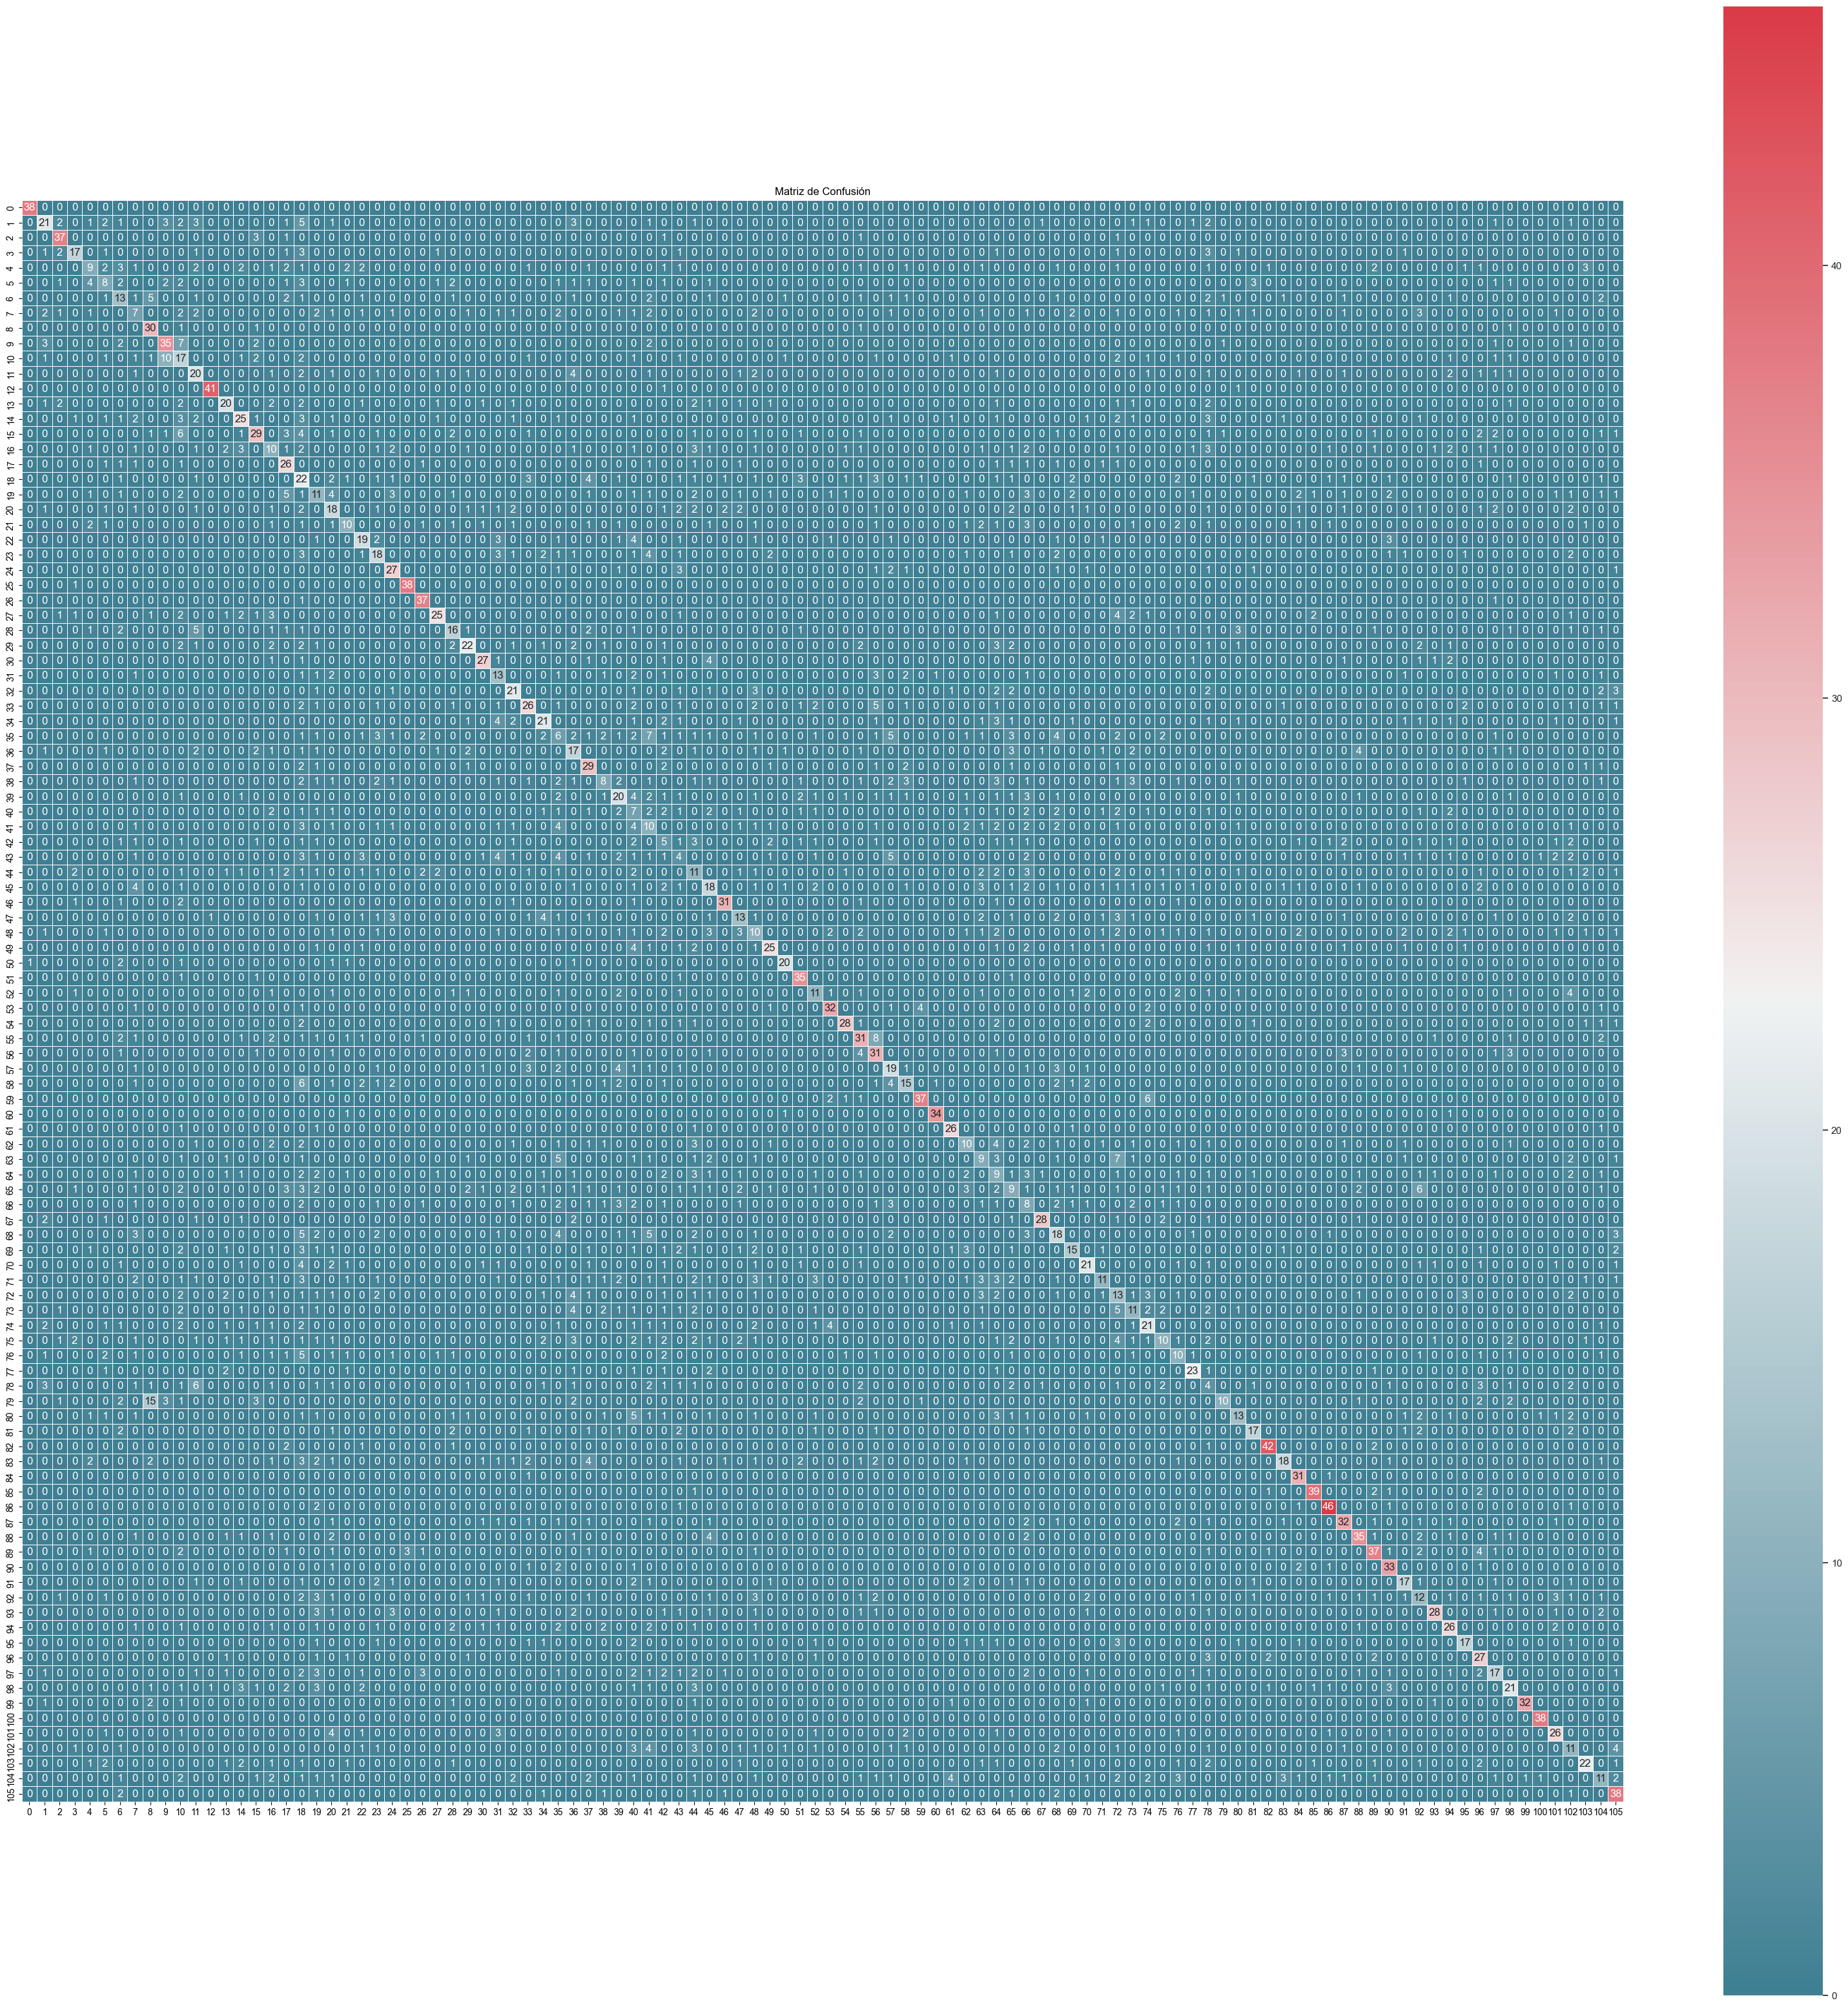

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, precision_score, recall_score 
from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(40, 40))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

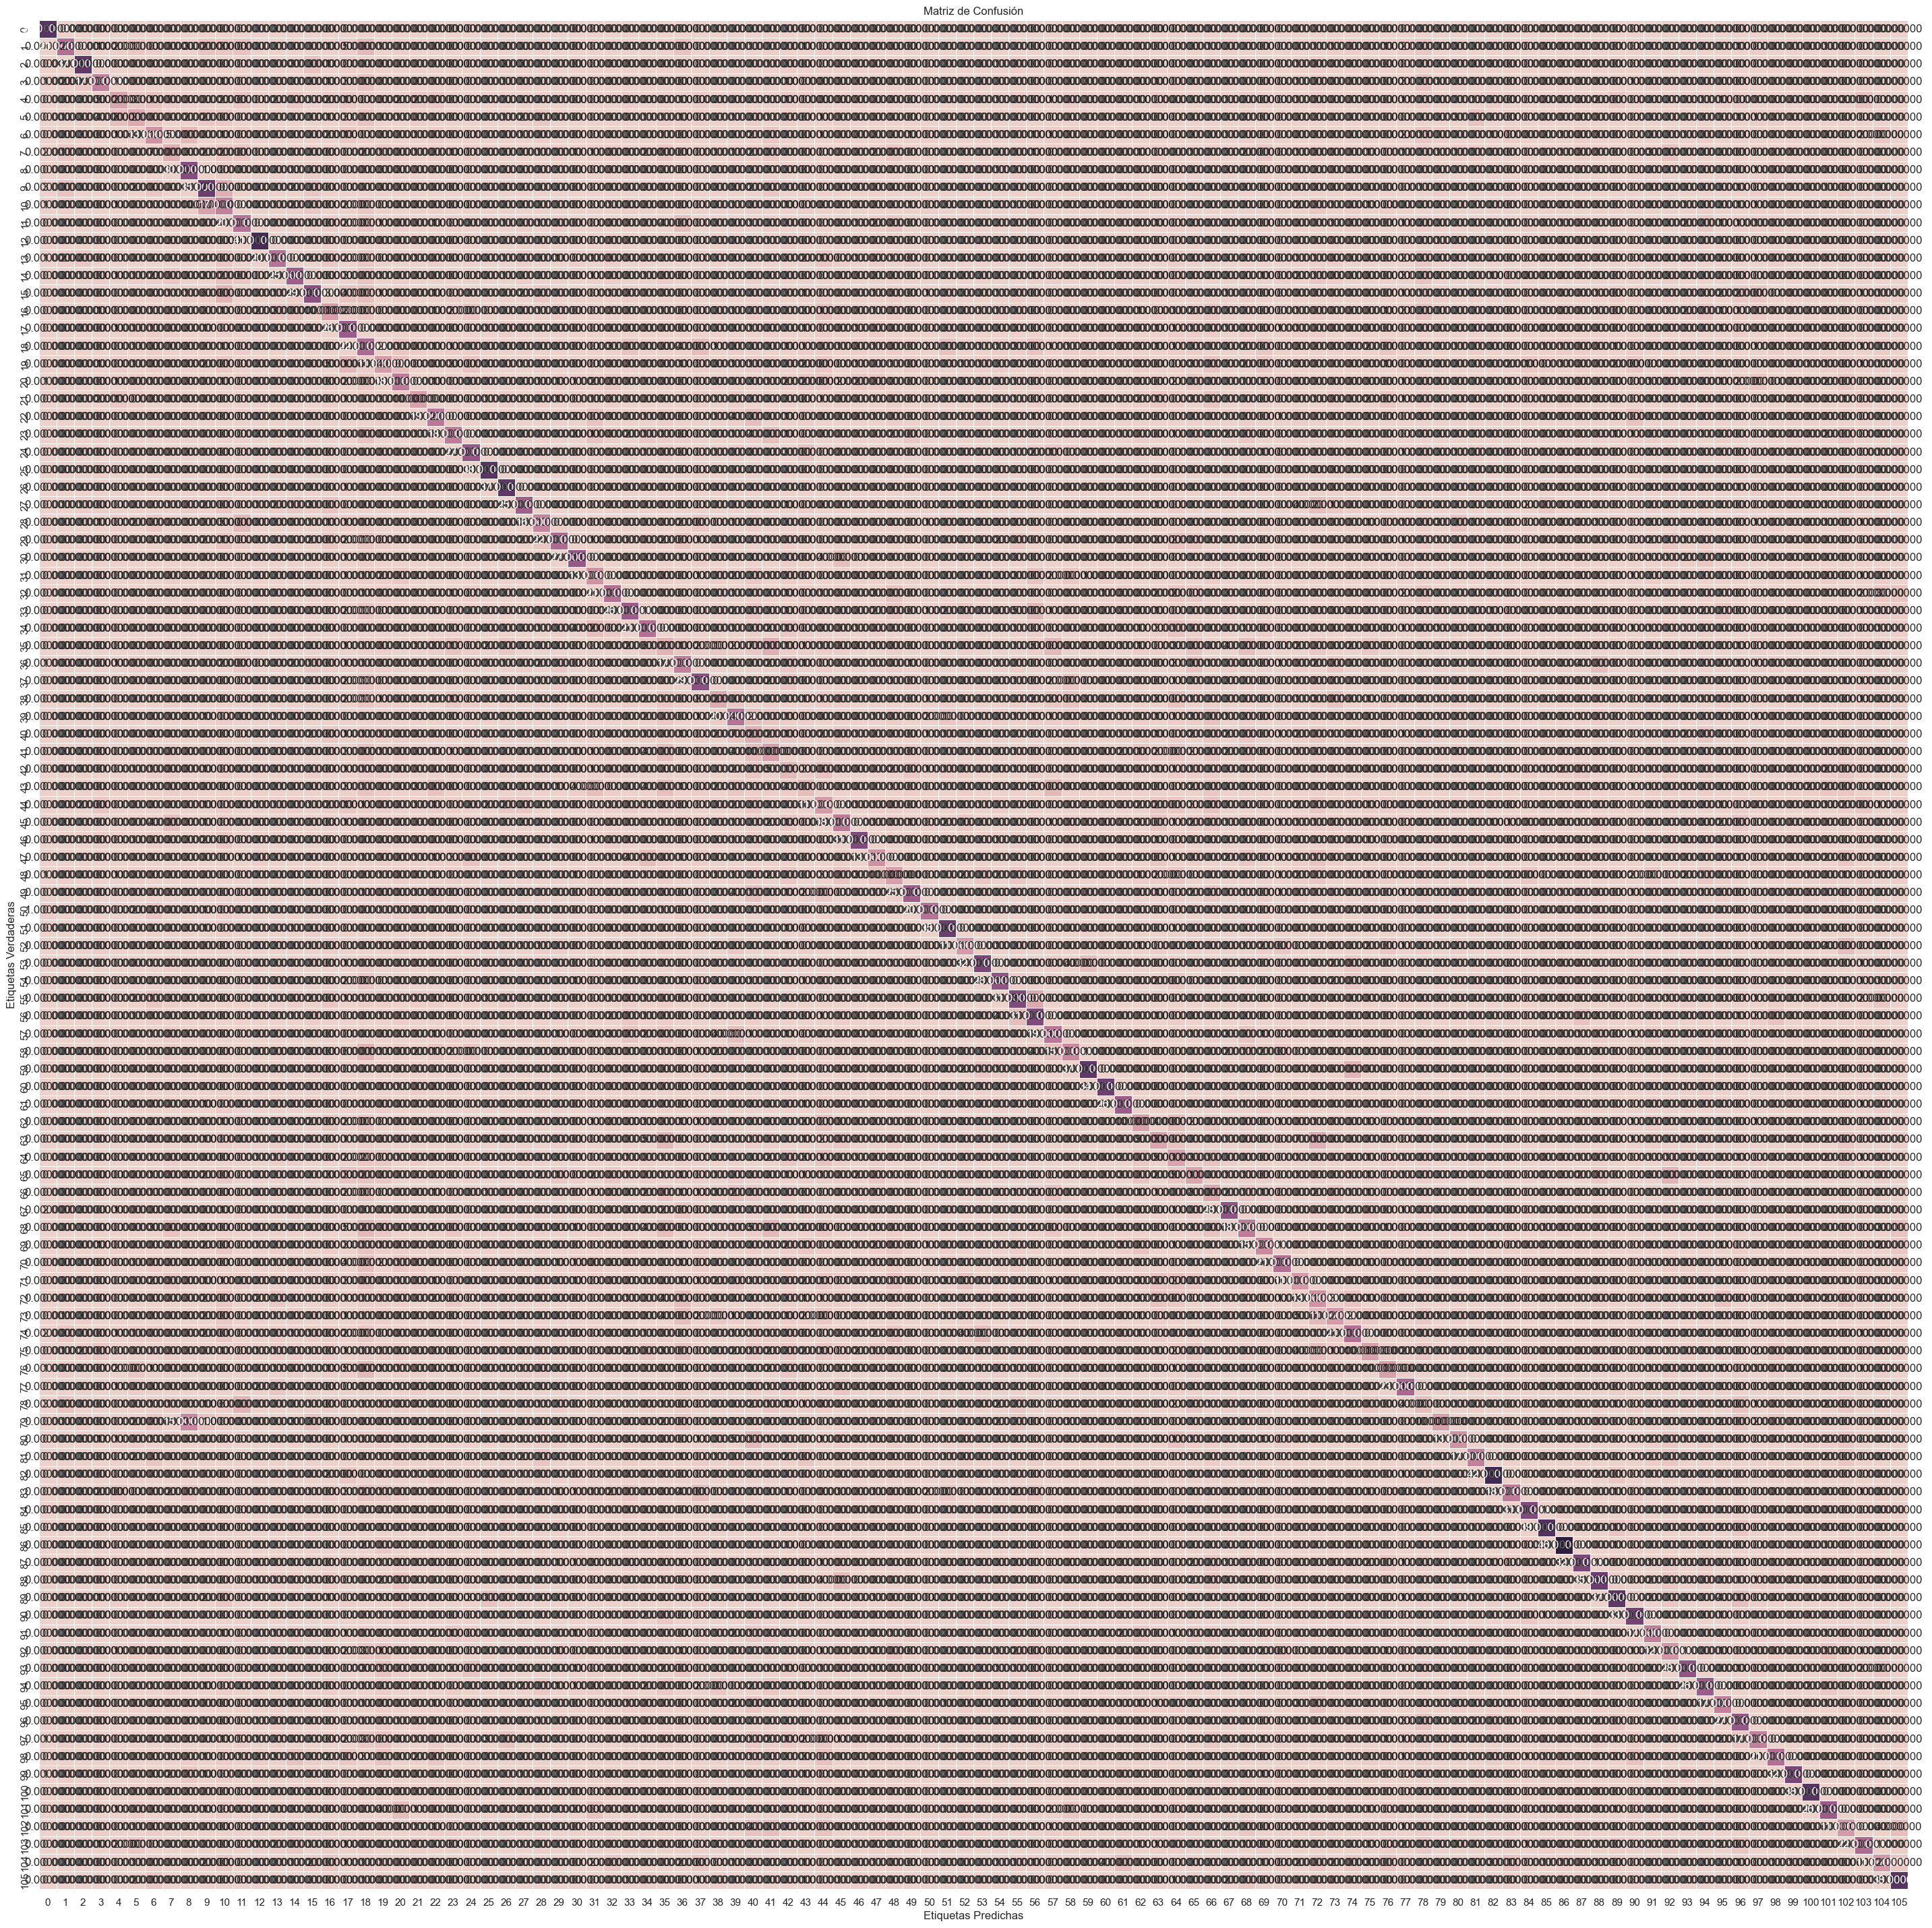

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Supongamos que ya tienes las etiquetas verdaderas y predichas
# test_true_labels y test_predicted_labels

C = confusion_matrix(test_true_labels, test_predicted_labels)

# Ajusta el tamaño de la figura
plt.figure(figsize=(36, 36))

# Utiliza un mapa de colores personalizado
cmap = sns.cubehelix_palette(50, as_cmap=True)

# Dibuja la matriz de confusión con anotaciones y un borde
sns.heatmap(C, cmap=cmap, square=True, annot=True, fmt='f', linewidths=.5, cbar=False)

# Añade etiquetas de los ejes
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')

# Añade un título
plt.title('Matriz de Confusión')

# Muestra el gráfico
plt.show()


In [17]:
#Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score

In [18]:
#Real_labels son las etiquetas reales y predicted_label son las etiquetas predichas por el modelo
accuracy = accuracy_score(test_true_labels, test_predicted_labels)
mcc = matthews_corrcoef(test_true_labels, test_predicted_labels)
bal_acc=balanced_accuracy_score(test_true_labels, test_predicted_labels)

print(f'Accuracy: {accuracy}')
print(f'Matthews Correlation Coefficient: {mcc}')
print(f'balanced_accuracy_score: {bal_acc}')

Accuracy: 0.46725256329776105
Matthews Correlation Coefficient: 0.4622806650979536
balanced_accuracy_score: 0.478444511898311
